In [68]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import skimage
from skimage import feature
from skimage import io
from skimage import draw
from skimage import color
from scipy.spatial import Delaunay

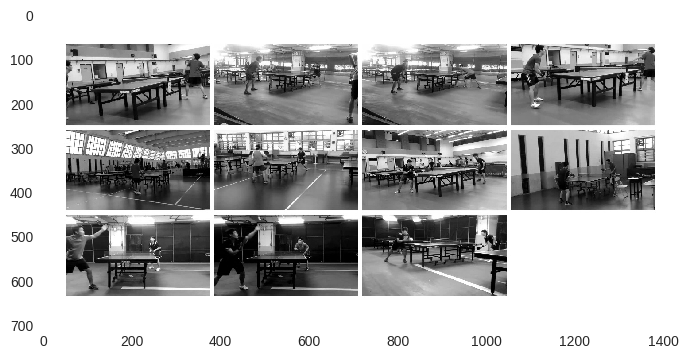

In [97]:
cimg = skimage.img_as_float(io.imread('./explore.jpg'))
img = color.rgb2gray(cimg)

fig, ax = plt.subplots(dpi=100)
ax.imshow(img, cmap='gray')
ax.grid(False)
plt.show()

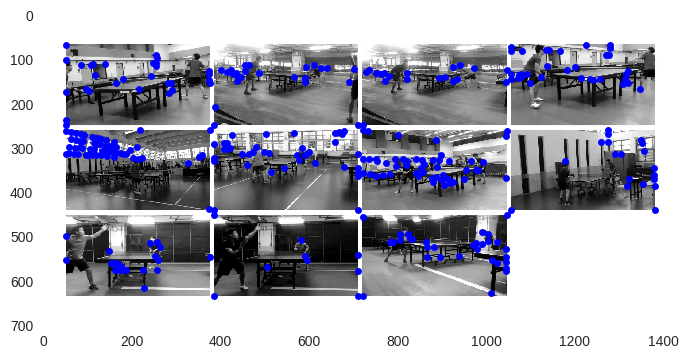

CPU times: user 568 ms, sys: 381 ms, total: 949 ms
Wall time: 516 ms


In [115]:
%%time
coords = feature.corner_peaks(feature.corner_harris(img), min_distance=5)
points = coords[:, [1, 0]]

fig, ax = plt.subplots(dpi=100)
ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(points[:, 0], points[:, 1], '.b', markersize=10)
ax.grid(False)
plt.show()

In [124]:
%%time

points = np.random.rand(500, 2)
points[:, 0] *= w
points[:, 1] *= h

CPU times: user 211 µs, sys: 0 ns, total: 211 µs
Wall time: 301 µs


In [180]:
%%time

x = np.arange(0, w, 20)
y = np.arange(0, h, 20)
xx, yy = np.meshgrid(x, y)

n_points = xx.shape[0] * xx.shape[1]
points = np.zeros((n_points, 2), dtype=np.float32)
points[:, 0] = xx.flatten() + np.random.rand(n_points) * 15
points[:, 1] = yy.flatten() + np.random.rand(n_points) * 15

(35, 70)
(35, 70)
CPU times: user 1.11 ms, sys: 87 µs, total: 1.2 ms
Wall time: 1.31 ms


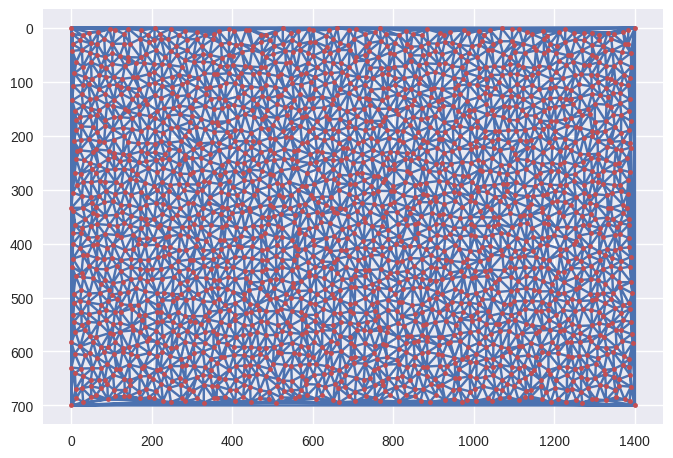

CPU times: user 588 ms, sys: 391 ms, total: 979 ms
Wall time: 535 ms


In [181]:
%%time

h, w = img.shape
points = np.vstack((points, [[0, 0]], [[w, 0]], [[0, h]], [[w, h]]))
tri = Delaunay(points)

fig, ax = plt.subplots(dpi=100)
ax.triplot(points[:,0], points[:,1], tri.simplices.copy())
ax.plot(points[:, 0], points[:, 1], '.')
ax.invert_yaxis()
plt.show()

/home/amoshyc/miniconda3/envs/poly/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amoshyc/miniconda3/envs/poly/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


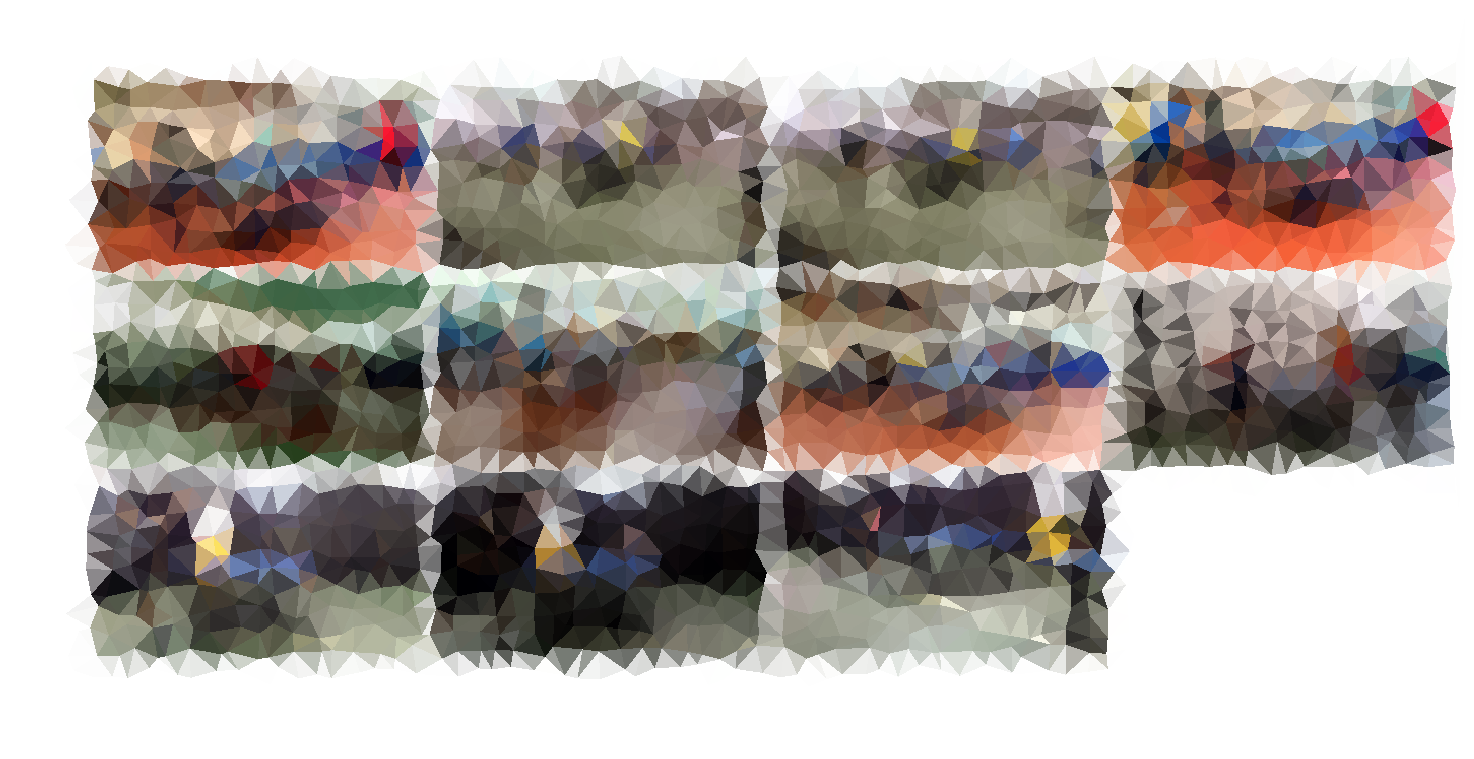

CPU times: user 1.83 s, sys: 448 ms, total: 2.28 s
Wall time: 1.77 s


In [182]:
%%time

res = np.zeros((h, w, 3), dtype=np.float32)
for indices in tri.simplices:
    t = points[indices]
    yy, xx = draw.polygon(t[:, 0], t[:, 1])
    avg = np.mean(cimg[xx, yy, :], axis=0)
    res[xx, yy, :] = avg
    
fig, ax = plt.subplots(dpi=100, figsize=(15, 8))
ax.imshow(res, interpolation='nearest')
ax.axis('off')
fig.tight_layout()
fig.savefig('low.png')
plt.show()